In [1]:
import os
import glob
import numpy as np
import bokeh.io
import bokeh.plotting
import bokeh.palettes
from bokeh.transform import jitter
import seaborn as sns
import matplotlib
from bokeh.models import HoverTool, Range1d
from scipy import stats
import pandas as pd
import math

from bokeh.layouts import row
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
def bootstrap_sampling(my_array, bootstrap_samples, bootstrap_replicates):
    bs_samples=np.zeros((bootstrap_replicates, bootstrap_samples))
    bs_rep=np.arange(bootstrap_replicates)
    for i in bs_rep:
        bs_samples[i, :]=np.random.choice(my_array, bootstrap_samples)
    return bs_samples

def bootstrap_stats(bs_samples):
    samples_shape=np.shape(bs_samples)
    bs_means=np.zeros((samples_shape[0], 1))
    bs_IC_means=np.zeros((1, 2))
    bs_medians=np.zeros((samples_shape[0], 1))
    bs_IC_medians=np.zeros((1, 2))
    for i in np.arange(samples_shape[0]):
        bs_means[i]=np.mean(bs_samples[i, :])
        bs_medians[i]=np.median(bs_samples[i, :])
    bs_IC_means[0, 0]=np.quantile(bs_means, .025)
    bs_IC_means[0, 1]=np.quantile(bs_means, .975)
    bs_IC_medians[0, 0]=np.quantile(bs_medians, .025)
    bs_IC_medians[0, 1]=np.quantile(bs_medians, .975)
    return np.mean(bs_means), np.median(bs_medians), bs_IC_means, bs_IC_medians

In [6]:
#set root folder
#path='D:/Pili_and_PaQa_counts_data/fliC-'
path='G:/Sauvegardes PhD/Covid-19/Pili_and_PaQa_counts_data/PaQa_data/fliC-'
os.chdir(path)
extension = 'csv'
list_csv = []
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        if extension in name:
            list_csv.append(os.path.join(root, name))
#os.chdir("C:/users/tala/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/")
os.chdir("C:/users/tala/Desktop/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/")
new_dir = "Data_PaQa\\"
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
os.chdir(new_dir)
combined_csv = pd.concat([pd.read_csv(f) for f in list_csv ], sort=False)
combined_csv.to_csv( "Pili_PaQa_Data_new.csv", index=False, encoding='utf-8-sig')
combined_csv.head()

,,Label,Area,Mean,Min,Max,X,Y,BiologicalReplicate,CellArea,...,Y_PoleBright,AreaPoleBright,MeanPoleBright,TotalFluorescencePoleBright,MinPoleBright,MaxPoleBright,StdPoleBright,Nb_Pili_PoleBright,Nb_Flagella_PoleBright,PolarRatio
0,1,fliC-_PaQa_Gasket_0_event11_tirf_RAW_Stack.tif,624,255,255,255,12.85256,36.78526,1,698,...,267.00055,137,924.18248,126613.0,447,1372,255.43530,1,0,0.81639
1,2,fliC-_PaQa_Gasket_0_event11_tirf_RAW_Stack.tif,405,255,255,255,26.79630,14.51481,1,463,...,382.94844,112,472.66071,52938.0,160,749,172.91593,0,0,0.82471
0,1,fliC-_PaQa_Gasket_0_event14_tirf_RAW_Stack.tif,700,255,255,255,42.52714,19.50143,1,785,...,374.36932,137,489.30657,67035.0,190,696,145.71444,0,0,0.85555
0,1,fliC-_PaQa_Gasket_0_event15_tirf_RAW_Stack.tif,405,255,255,255,20.37901,26.53457,1,463,...,263.14833,112,636.75000,71316.0,251,922,204.80945,1,0,0.86161
0,1,fliC-_PaQa_Gasket_0_event17_tirf_RAW_Stack.tif,607,255,255,255,38.52636,14.36985,1,686,...,316.50121,137,849.42336,116371.0,304,1410,303.13205,1,0,0.74817


In [32]:
app_root_dir = "C:/Users/tala/Desktop/git/PhD_codes/Mechanosensation/Python_code/Pole_analysis/"
os.chdir(app_root_dir + "Data_PaQa\\")
df_full = pd.read_csv("Pili_PaQa_Data_new.csv", sep=',', na_values='*')
df_full['PercentTotalFluoDim']=df_full['TotalFluorescencePoleDim']/df_full['CellTotalFluorescence']
df_full['PercentTotalFluoBright']=df_full['TotalFluorescencePoleBright']/df_full['CellTotalFluorescence']
df_full['TotalPili']=df_full['Nb_Pili_PoleDim']+df_full['Nb_Pili_PoleBright']
df_full['TotalFlagella']=df_full['Nb_Flagella_PoleDim']+df_full['Nb_Flagella_PoleBright']
param1='CellTotalFluorescence'
param2='TotalPili'
poisson_lambda=df_full[param2].mean()

tot_pili_limit=6
df=df_full.loc[df_full[param2]<tot_pili_limit]        

Ncells_per_pili=np.empty((tot_pili_limit), dtype='int16')
N=len(df)
print('Ncells='+str(N), end=', ')
for i in range(tot_pili_limit):
    Ncells_per_pili[i]=len(df.loc[(df[param2]==i)])
    if (i<tot_pili_limit-1):
        print('N_'+str(i)+'pili='+str(Ncells_per_pili[i]), end=', ')
    else: print('N_'+str(i)+'pili='+str(Ncells_per_pili[i]))       
df.head()

Ncells=102, N_0pili=12, N_1pili=18, N_2pili=19, N_3pili=24, N_4pili=16, N_5pili=13


,,Label,Area,Mean,Min,Max,X,Y,BiologicalReplicate,CellArea,...,MinPoleBright,MaxPoleBright,StdPoleBright,Nb_Pili_PoleBright,Nb_Flagella_PoleBright,PolarRatio,PercentTotalFluoDim,PercentTotalFluoBright,TotalPili,TotalFlagella
0,1,fliC-_PaQa_Gasket_0_event11_tirf_RAW_Stack.tif,624,255,255,255,12.85256,36.78526,1,698,...,447,1372,255.43530,1,0,0.81639,0.163458,0.181909,3,0
1,2,fliC-_PaQa_Gasket_0_event11_tirf_RAW_Stack.tif,405,255,255,255,26.79630,14.51481,1,463,...,160,749,172.91593,0,0,0.82471,0.212794,0.223173,1,0
2,1,fliC-_PaQa_Gasket_0_event14_tirf_RAW_Stack.tif,700,255,255,255,42.52714,19.50143,1,785,...,190,696,145.71444,0,0,0.85555,0.148899,0.165582,1,0
3,1,fliC-_PaQa_Gasket_0_event15_tirf_RAW_Stack.tif,405,255,255,255,20.37901,26.53457,1,463,...,251,922,204.80945,1,0,0.86161,0.215917,0.230842,3,0
4,1,fliC-_PaQa_Gasket_0_event17_tirf_RAW_Stack.tif,607,255,255,255,38.52636,14.36985,1,686,...,304,1410,303.13205,1,0,0.74817,0.159224,0.173028,5,0


In [33]:
nb_pili=np.zeros((tot_pili_limit, 1))
boot_mean=np.zeros((tot_pili_limit, 1))
boot_median=np.zeros((tot_pili_limit, 1))
boot_IC_mean=np.zeros((tot_pili_limit, 2))
boot_IC_median=np.zeros((tot_pili_limit, 2))
for n_pili in range(tot_pili_limit):
    cell_fluorescence_array=df.CellTotalFluorescence.loc[(df[param2]==n_pili)].values
    nb_pili[n_pili]=n_pili
    if (len(cell_fluorescence_array) > 0):
        bs_cell_fluorescence_array=bootstrap_sampling(cell_fluorescence_array, len(cell_fluorescence_array), 1000)
        [bs_means, bs_medians, IC_means, IC_medians]=bootstrap_stats(bs_cell_fluorescence_array)
        boot_mean[n_pili]=bs_means
        boot_IC_mean[n_pili,:]=IC_means
        boot_median[n_pili]=bs_medians
        boot_IC_median[n_pili,:]=IC_medians

names = [param2, 'bootMean','bootMedian']
data = np.concatenate((nb_pili, boot_mean, boot_median), axis=1)
df_boot_stats=pd.DataFrame(data=np.transpose(data), index=names).T
df_boot_stats['IC_mean']=list(boot_IC_mean)
df_boot_stats['IC_median']=list(boot_IC_median)
df_boot_stats.to_csv( "boot_Pili_PaQa_Data.csv", index=False, encoding='utf-8-sig')
df_boot_stats.head(100)

,TotalPili,bootMean,bootMedian,IC_mean,IC_median
0,0.0,414878.870167,294366.0,"[281840.73125, 577514.8687499999]","[236620.0, 609065.0]"
1,1.0,643345.639500,444462.0,"[428999.0, 953178.7097222221]","[330372.5, 677722.0]"
2,2.0,615993.730421,458015.0,"[424640.3434210526, 844058.0249999999]","[304316.0, 732782.0]"
3,3.0,555109.556750,425175.0,"[409438.47812499997, 751906.0104166666]","[344902.0, 658069.5750000001]"
4,4.0,771613.324937,594554.5,"[531266.059375, 1049568.1296875]","[350062.0, 1064847.4249999984]"
5,5.0,987672.698154,852350.0,"[651923.7788461539, 1401818.6307692307]","[448312.0, 1122668.0]"


In [34]:
Prob_per_pili = Ncells_per_pili/N
Prob_per_pili.sum()

1.0

In [35]:
p0 = bokeh.plotting.figure(
    width=600, 
    height=600, 
    x_axis_label='# pili', 
    y_axis_type='linear',
    y_axis_label ='P(# pili)',
    title="Probability of having # pili"
)

x_1=range(tot_pili_limit)

p0.line(
    x=x_1,
    y=Prob_per_pili, 
    line_color = 'blue',
    #fill_color = 'blue',
    alpha=0.7,
    #legend = labelsAll[i]
    legend = 'Data'
)

bokeh.io.show(p0)

In [36]:
print(param1+' vs '+param2+':')

[spearman_r, spearman_p]=stats.spearmanr(df[param1], df[param2])
print('Spearman correlation = '+str(spearman_r)+', p-value = '+ str(spearman_p))

[pearson_r, pearson_p]=stats.pearsonr(df[param1], df[param2])
print('Pearson correlation = '+str(pearson_r)+', p-value = '+str(pearson_p))

CellTotalFluorescence vs TotalPili:
Spearman correlation = 0.2592697249548751, p-value = 0.008503840572286217
Pearson correlation = 0.24092991812273482, p-value = 0.01471446514679028


In [37]:
parameter1='bootMean'
parameter2='bootMedian'
IC1='IC_mean'
IC2='IC_median'
p3 = bokeh.plotting.figure(
    width=600, 
    height=600,  
    x_axis_type='linear',
    y_axis_type='linear',
    x_axis_label = '#Pili',
    y_axis_label = 'total fluorescence',
    title="Mean cell total fluorescence per pili nb (bootstrap mean, 95% IC)",
    x_range=Range1d(-0.5, tot_pili_limit)
)

p4 = bokeh.plotting.figure(
    width=600, 
    height=600,  
    x_axis_type='linear',
    y_axis_type='linear',
    x_axis_label = '#Pili',
    y_axis_label = 'total fluorescence',
    title="Median cell total fluorescence per pili nb (bootstrap median, 95% IC)",
    x_range=Range1d(-0.5, tot_pili_limit)
)

In [38]:
p3.circle(
    source=df,
    x=param2,
    y=param1, 
    line_color = 'blue',
    fill_color = 'navy',
    alpha=0.7,
    #legend = labelsAll[i]
)

p4.circle(
    source=df,
    x=param2,
    y=param1, 
    line_color = 'blue',
    fill_color = 'navy',
    alpha=0.7,
    #legend = labelsAll[i]
)

for n_pili in list(df_boot_stats[param2]):
    b = [n_pili,n_pili]
    m=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [parameter1]].values[0][0]
    ic=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [IC1]].values[0][0]
    if (m-ic[0] < 0):
        a = [0, m+ic[1]]
    else: a = [m-ic[0], m+ic[1]]
    p3.line(
        x = b,
        y = ic,
        color = 'black',
        alpha=0.5,
        line_width=3
    )
    
for n_pili in list(df_boot_stats[param2]):
    b = [n_pili,n_pili]
    m=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [parameter2]].values[0][0]
    ic=df_boot_stats.loc[(df_boot_stats[param2] == n_pili), [IC2]].values[0][0]
    if (m-ic[0] < 0):
        a = [0, m+ic[1]]
    else: a = [m-ic[0], m+ic[1]]
    p4.line(
        x = b,
        y = ic,
        color = 'black',
        alpha=0.5,
        line_width=3
    )
    
p3.circle(
    source = df_boot_stats.loc[:, [param2, parameter1]],
    x = param2,
    y = parameter1,
    line_color = 'black',
    fill_color = 'white',
    alpha=0.6,
    size=10
)

p4.circle(
    source = df_boot_stats.loc[:, [param2, parameter2]],
    x = param2,
    y = parameter2,
    line_color = 'black',
    fill_color = 'white',
    alpha=0.6,
    size=10
)  

p3.output_backend = 'svg'
p4.output_backend = 'svg'

bokeh.io.show(bokeh.layouts.row(p3, p4))

In [39]:
print(parameter2+' vs '+param2+':')

[spearman_r, spearman_p]=stats.spearmanr(df_boot_stats[parameter2], df_boot_stats[param2])
print('Spearman correlation = '+str(spearman_r)+', p-value = '+ str(spearman_p))

[pearson_r, pearson_p]=stats.pearsonr(df_boot_stats[parameter2], df_boot_stats[param2])
print('Pearson correlation = '+str(pearson_r)+', p-value = '+str(pearson_p))

bootMedian vs TotalPili:
Spearman correlation = 0.8285714285714287, p-value = 0.04156268221574334
Pearson correlation = 0.8912026440385851, p-value = 0.01711138720712349


In [40]:
df['piliB_piliD']=df['Nb_Pili_PoleBright']-df['Nb_Pili_PoleDim']
df['piliB_piliD_over_Tot']=df['piliB_piliD']/df['TotalPili']

C:\Users\tala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.4555555555555555
1.0


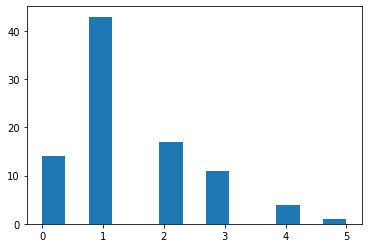

In [41]:
import matplotlib.pyplot as plt

x_pili = np.abs(df.loc[df['TotalPili']>0,'piliB_piliD'].values)
print(np.mean(x_pili))
print(np.median(x_pili))
plt.hist(x_pili, bins = 13)
plt.show()

0.5796296296296297
0.5


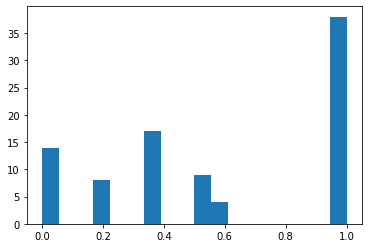

In [42]:
y_pili = np.abs(df.loc[df['TotalPili']>0,'piliB_piliD_over_Tot'].values)
print(np.mean(y_pili))
print(np.median(y_pili))
plt.hist(y_pili, bins = 18)
plt.show()